# **Pregunta de negocio**

Dado el contexto de la situación, se desarrolla un análisis exploratorio de datos al dataset Student_performance_data.csv, con la finalidad de determinar si con los datos y las caracteristicas de los mismos, se puede resolver la pregunta clave de negocio, la cual es:

**¿Es posible predecir la deserción estudiantil en las Instuticiones Educativas del Departamento para el próximo periodo, usando datos demográficos y académicos con una efectividad de al menos el 70%?**

A continuación se relacionan los pasos a seguir para dar respuesta a la pregunta clave.

1. *Cargue del dataset tomado de: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset
2. Consolidación del diccionario de datos para el entendimiento del caso
3. Instalación y/o cargue de librerias a usar
4. Entendimiento general del dataset - **Selección de columna para solución de problema**
5. Preparación de los datos
    - Ajuste de nombres de columnas y eliminación de columnas que no aportan información
    - Corrección de formato de datos
    - Identificación de outliers usando técnicas visuales y estadísticas
    - Tratamiento de outliers (si aplica)
6. **Análisis Univariado**
    - Análisis estadístico y gráfico

**Dataset modificado para desarrollo del ejercicio (modificación var GradeClass a Estado, donde GradeClass=0,1 = Estado=Graduado y GradeClass=2,3,4 = Estado=Abandono)*


# **1. Cargue del dataset**

In [522]:
import pandas as pd
ruta_csv = "C:/Users/cristian/Desktop/Maestria Inteligencia Artificial/Analisis_de_datos_1/Analisis-de-datos1/Student_performance_data.csv"
df = pd.read_csv(ruta_csv)
df.head(5)

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA    Estado  
0             0  2.929196  Abandono  
1             0  3.042915  Graduado  
2             0  0.112602  Abandono  
3             0  2.054218  Abandono  
4             0  1.288061  Abandono

In [523]:
df.shape

(2392, 15)

### El dataset cuenta con 2392 instancias/estudiantes y 14 columnas/variables

# **2. Consolidación diccionario de datos**

## Dato

- StudentID: Tipo: numérico, Definición: identificador unico asignado a cada individuo en el establecimiento, Unidad de medida: identificador
- Age: Tipo: numérico, Definición: indica la edad de cada individuo, Unidad de medida: Años
- Gender: Tipo: binario, Definición: identifica el género de cada individuo donde 0=masculino y 1=femenino, Unidad de medida: NA
- Ethnicity: Tipo: Categórico ordinal, Definición: identifica el grupo étnico del individuo donde 0=caucásico 1=afroamericano 2=asiático 3=otros, Unidad de medida: NA
- ParentalEducation: Tipo: Categórico ordinal, Definición: identifica el nivel de educación de los padres donde 0=ninguno 1=escuela secundaria 2=un poco de universidad 3=licenciatura 4=superior, Unidad de medida: NA
- StudyTimeWeekly: Tipo: Numérico, Definición: indica las horas de estudio semanal dedicadas por el individuo, Unidad de medida: Horas
- Absences: Tipo: Numérico, Definición: indica el número de ausencias al año, Unidad de medida: Ausencias anuales
- Tutoring: Tipo: binario, Definición: indica si el individuo asiste a tutorias donde 0=no y 1=si, Unidad de medida: NA
- ParentalSupport: Tipo: Categórico ordinal, Definición: identifica el nivel de apoyo que tiene el individuo por parte de sus padres donde 0=ninguno 1=bajo 2=moderado 3=alto 4=muy alto, Unidad de medida: NA
- Extracurricular: Tipo: binario, Definición: indica si el individuo participa en actividades extracurriculares donde 0=no y 1=si, Unidad de medida: NA
- Sports: Tipo: binario, Definición: indica si el individuo participa en actividades deportivas donde 0=no y 1=si, Unidad de medida: NA
- Music: Tipo: binario, Definición: indica si el individuo participa en actividades musicales donde 0=no y 1=si, Unidad de medida: NA
- Volunteering: Tipo: binario, Definición: indica si el individuo participa en actividades de voluntariado donde 0=no y 1=si, Unidad de medida: NA

- GPA: Tipo: Numérico, Definición: indica el promedio de calificaciones obtenidas, Unidad de medida: Puntos

- **Estado: Tipo: binario, Definición: indica si el individuo se graduó o abandonó los estudios donde 0=Graduado y 1=Abandono, Unidad de medida: NA**

# **3. Instalación/cargue de librerias a usar**

## A continuación se importan e indican las funcionalidades de las librerias a usar en este proceso

In [524]:
import numpy as np # Cálculo numérico
import matplotlib.pyplot as plt # Crear gráficas
from matplotlib import rcParams # Personalizar las gráficas
import altair as alt # Crear gráficas interactivas
import plotly.express as px # Crear gráficas interactivas
import pathlib # Manejar rutas de archivo
import seaborn as sns # Crear visualizaciones estadísticas (opcional)
import miceforest as mf # Imputar datos faltantes

# **4. Entendimiento general del dataset**

In [525]:
df.head()

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA    Estado  
0             0  2.929196  Abandono  
1             0  3.042915  Graduado  
2             0  0.112602  Abandono  
3             0  2.054218  Abandono  
4             0  1.288061  Abandono

## Se ajusta el nombre de las columnas para mejor entendimiento del proceso

In [526]:
df.columns = ["ID_Est","Edad","Genero","Grupo_et","Nivel_edu_padres","Horas_de_est_semanal","Ausencias","Tutoria","Apoyo_padres","Extracurricular","Deporte","Musica","Voluntariado","Prom_notas","Estado_est"]

df.head()

ID_Est  Edad  Genero  Grupo_et  Nivel_edu_padres  Horas_de_est_semanal  \
0    1001    17       1         0                 2             19.833723   
1    1002    18       0         0                 1             15.408756   
2    1003    15       0         2                 3              4.210570   
3    1004    17       1         0                 3             10.028829   
4    1005    17       1         0                 2              4.672495   

   Ausencias  Tutoria  Apoyo_padres  Extracurricular  Deporte  Musica  \
0          7        1             2                0        0       1   
1          0        0             1                0        0       0   
2         26        0             2                0        0       0   
3         14        0             3                1        0       0   
4         17        1             3                0        0       0   

   Voluntariado  Prom_notas Estado_est  
0             0    2.929196   Abandono  
1             0    3.042915   Graduado  
2             0    0.112602   Abandono  
3             0    2.054218   Abandono  
4             0    1.288061   Abandono

## Se transforma la variable Estado_est a las categorías Graduado:0 y Abandono:1, esto con la finalidad de tener la variable dicotómica para su correspondiente tratamiento

In [527]:
df['Estado_est'] = df['Estado_est'].replace({'Graduado': 0, 'Abandono': 1})

C:\Users\cristian\AppData\Local\Temp\ipykernel_25084\2202021212.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [528]:
df.head(10)

ID_Est  Edad  Genero  Grupo_et  Nivel_edu_padres  Horas_de_est_semanal  \
0    1001    17       1         0                 2             19.833723   
1    1002    18       0         0                 1             15.408756   
2    1003    15       0         2                 3              4.210570   
3    1004    17       1         0                 3             10.028829   
4    1005    17       1         0                 2              4.672495   
5    1006    18       0         0                 1              8.191219   
6    1007    15       0         1                 1             15.601680   
7    1008    15       1         1                 4             15.424496   
8    1009    17       0         0                 0              4.562008   
9    1010    16       1         0                 1             18.444466   

   Ausencias  Tutoria  Apoyo_padres  Extracurricular  Deporte  Musica  \
0          7        1             2                0        0       1   
1          0        0             1                0        0       0   
2         26        0             2                0        0       0   
3         14        0             3                1        0       0   
4         17        1             3                0        0       0   
5          0        0             1                1        0       0   
6         10        0             3                0        1       0   
7         22        1             1                1        0       0   
8          1        0             2                0        1       0   
9          0        0             3                1        0       0   

   Voluntariado  Prom_notas  Estado_est  
0             0    2.929196           1  
1             0    3.042915           0  
2             0    0.112602           1  
3             0    2.054218           1  
4             0    1.288061           1  
5             0    3.084184           0  
6             0    2.748237           1  
7             0    1.360143           1  
8             1    2.896819           1  
9             0    3.573474           0

In [529]:
df.tail(10)

ID_Est  Edad  Genero  Grupo_et  Nivel_edu_padres  Horas_de_est_semanal  \
2382    3383    16       0         0                 3             13.941823   
2383    3384    16       1         2                 2             11.736409   
2384    3385    15       1         0                 1             16.655581   
2385    3386    16       1         0                 1              1.445434   
2386    3387    16       0         0                 2             13.814021   
2387    3388    18       1         0                 3             10.680555   
2388    3389    17       0         0                 1              7.583217   
2389    3390    16       1         0                 2              6.805500   
2390    3391    16       1         1                 0             12.416653   
2391    3392    16       1         0                 2             17.819907   

      Ausencias  Tutoria  Apoyo_padres  Extracurricular  Deporte  Musica  \
2382         20        0             2                0        0       0   
2383         18        1             4                0        0       0   
2384         13        1             3                0        1       0   
2385         20        0             3                1        1       0   
2386         14        0             2                0        0       0   
2387          2        0             4                1        0       0   
2388          4        1             4                0        1       0   
2389         20        0             2                0        0       0   
2390         17        0             2                0        1       1   
2391         13        0             2                0        0       0   

      Voluntariado  Prom_notas  Estado_est  
2382             0    1.191929           1  
2383             0    1.810038           1  
2384             0    2.539113           1  
2385             0    1.395631           0  
2386             0    2.000084           1  
2387             0    3.455509           0  
2388             0    3.279150           1  
2389             1    1.142333           1  
2390             0    1.803297           0  
2391             1    2.140014           0

## Se reconoce el tipo de dato inicial del df y se evalua si alguna variable tiene datos nulos

In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Est                2392 non-null   int64  
 1   Edad                  2392 non-null   int64  
 2   Genero                2392 non-null   int64  
 3   Grupo_et              2392 non-null   int64  
 4   Nivel_edu_padres      2392 non-null   int64  
 5   Horas_de_est_semanal  2392 non-null   float64
 6   Ausencias             2392 non-null   int64  
 7   Tutoria               2392 non-null   int64  
 8   Apoyo_padres          2392 non-null   int64  
 9   Extracurricular       2392 non-null   int64  
 10  Deporte               2392 non-null   int64  
 11  Musica                2392 non-null   int64  
 12  Voluntariado          2392 non-null   int64  
 13  Prom_notas            2392 non-null   float64
 14  Estado_est            2392 non-null   int64  
dtypes: float64(2), int64(

## No se evidencian datos nulos, sin embargo, existen variables que no están en formato correcto de acuerdo a su naturaleza, por lo tanto, se procede a cambiar el tipo de dato

In [531]:
df["Estado_est"] = df["Estado_est"].astype(bool)
df["Genero"] = df["Genero"].astype(bool)
df["Tutoria"] = df["Tutoria"].astype(bool)
df["Extracurricular"] = df["Extracurricular"].astype(bool)
df["Deporte"] = df["Deporte"].astype(bool)
df["Musica"] = df["Musica"].astype(bool)
df["Voluntariado"] = df["Voluntariado"].astype(bool)

## Se verifica que los datos del dataframe queden con los tipos de datos que corresponda

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Est                2392 non-null   int64  
 1   Edad                  2392 non-null   int64  
 2   Genero                2392 non-null   bool   
 3   Grupo_et              2392 non-null   int64  
 4   Nivel_edu_padres      2392 non-null   int64  
 5   Horas_de_est_semanal  2392 non-null   float64
 6   Ausencias             2392 non-null   int64  
 7   Tutoria               2392 non-null   bool   
 8   Apoyo_padres          2392 non-null   int64  
 9   Extracurricular       2392 non-null   bool   
 10  Deporte               2392 non-null   bool   
 11  Musica                2392 non-null   bool   
 12  Voluntariado          2392 non-null   bool   
 13  Prom_notas            2392 non-null   float64
 14  Estado_est            2392 non-null   bool   
dtypes: bool(7), float64(2

## El df queda estructurado así

- Variables bool: 7
- Variables int: 6
- Variables float: 2

In [533]:
df.describe(include="all")

ID_Est         Edad Genero     Grupo_et  Nivel_edu_padres  \
count   2392.000000  2392.000000   2392  2392.000000       2392.000000   
unique          NaN          NaN      2          NaN               NaN   
top             NaN          NaN   True          NaN               NaN   
freq            NaN          NaN   1222          NaN               NaN   
mean    2196.500000    16.468645    NaN     0.877508          1.746237   
std      690.655244     1.123798    NaN     1.028476          1.000411   
min     1001.000000    15.000000    NaN     0.000000          0.000000   
25%     1598.750000    15.000000    NaN     0.000000          1.000000   
50%     2196.500000    16.000000    NaN     0.000000          2.000000   
75%     2794.250000    17.000000    NaN     2.000000          2.000000   
max     3392.000000    18.000000    NaN     3.000000          4.000000   

        Horas_de_est_semanal    Ausencias Tutoria  Apoyo_padres  \
count            2392.000000  2392.000000    2392   2392.000000   
unique                   NaN          NaN       2           NaN   
top                      NaN          NaN   False           NaN   
freq                     NaN          NaN    1671           NaN   
mean                9.771992    14.541388     NaN      2.122074   
std                 5.652774     8.467417     NaN      1.122813   
min                 0.001057     0.000000     NaN      0.000000   
25%                 5.043079     7.000000     NaN      1.000000   
50%                 9.705363    15.000000     NaN      2.000000   
75%                14.408410    22.000000     NaN      3.000000   
max                19.978094    29.000000     NaN      4.000000   

       Extracurricular Deporte Musica Voluntariado   Prom_notas Estado_est  
count             2392    2392   2392         2392  2392.000000       2392  
unique               2       2      2            2          NaN          2  
top              False   False  False        False          NaN       True  
freq              1475    1666   1921         2016          NaN       2016  
mean               NaN     NaN    NaN          NaN     1.906186        NaN  
std                NaN     NaN    NaN          NaN     0.915156        NaN  
min                NaN     NaN    NaN          NaN     0.000000        NaN  
25%                NaN     NaN    NaN          NaN     1.174803        NaN  
50%                NaN     NaN    NaN          NaN     1.893393        NaN  
75%                NaN     NaN    NaN          NaN     2.622216        NaN  
max                NaN     NaN    NaN          NaN     4.000000        NaN

## De acuerdo a la descripción general de los datos, y la naturaleza de los mismos, se resalta:

- La variable ID_Est no tiene ningun significado desde lo estadístico, mas que corroborar el número de instancias
- La Edad promedio de los estudiantes es de 16.46 años, el menor tiene 15 y el mayor tiene 18 años, y el estudiante que se encuentra en la mitad de los datos tiene 16 años (Q2:50%), dado lo anterior, se puede concluir que las edades de los estudiantes están bastante concentradas alrededor de los 16 años, con una distribución relativamente simétrica y un rango de edades estrecho (15-18 años), no parece haber edades extremas o outliers en los datos.
- Se encuentran 2 tipos de género en el dataset siguiendo lo establecido en el diccionario de datos, donde el género femenino tiene mayor representatividad
- El Grupo_et no tiene valores nulos, y al tener su media de 0.87 se puede intuir en primera instancia que la gran mayoria de los estudiantes pertenecen al grupo étnico causcásico, sin embargo, esto requerirá analisis posteriormente
- El Nivel_edu_padres esta conformado por 5 categrorías, y al tener su media de 1.74 se puede intuir en primera instancia que la gran mayoria de los padres de los estudiantes tienen formación de un poco de universidad y escuela secundaria, sin embargo, esto requerirá analisis posteriormente
- las Horas_de_est_semanal tiene un rango que parte desde 0 a aproximadamente 20 horas, donde la media de estudio semanal es de 9.77 horas con una desviación estandar de 5.04 horas, donde se puede afirmar dada las caracteristicas de la distribución (mediana de 9.70), que alrededor del 68% de los estudiantes dedican entre 4.12 y 15.42 horas de estudio, esto se analizará mas adelante
- Las ausencias tienen un rango entre 0 y 29, siendo el promedio de ausencias de los estudiantes 14.54 con una mediana de 15, y de acuerdo a la desviación estandar de 8.46 se puede concluir que aproximadamente el 95% de los estudiantes registran entre 6 y 23 Ausencias durante el año, esto se analizará detalladamente mas adelante
- Se puede indicar que la mayoría de los estudiantes no asiste a las tutorías
- Respecto al nivel de apoyo por parte de los padres se puede indicar que a la mayoría de los estudiantes sus padres los apoyan de forma moderada, esto se analizará mas adelante
- Frente a la participación en actividades extracurriculares, deportivas, musicales y de voluntariado se puede indicar que la mayoría de los estudiantes no participan en ellas, este análisis será abordado mas adelante
- Respecto al Prom_notas se evidencia que la nota mas baja obtenida fue de 0.0 y la mas alta 4.0, su media fue de 1.90 y con una mediana de 1.89, esto indica que la distribución de las notas es normal, su analisis detallado se hará mas adelante
- Por último, el Estado_est indica si el estudiante se Graduó:0 o Abandonó:1 sus estudios, por lo tanto, se puede indicar que la mayoría de los estudiantes Abandonó sus estudios, **el análisis de esta variable se hará de manera especial ya que esto es lo que se pretende predecir de acuerdo al contexto del problema y a la pregunta SMART**

## Selección y descripción de la columna/variable para el problema de Ciencia de Datos

De acuerdo al planteamiento inicial del problema, donde se indica el grado de deserción estudiantil, y a la estructura de los datos, se identifica que la variable objetivo/target del proceso es **Estado_est**, ya que esta variable indica si el estudiante se Graduó o Abandonó sus estudios, es importante resaltar que esta variable como indicador general compone el indice de deserción. ya que al tener x cantidad de estudiantes que Abandonaron sus estudios el indice se impacta.

Por otro lado, vale la pena mencionar que esta variable afecta directamente el Flujo de Caja de las instituciones, ya que al tener un alto indice de abandono escolar/estudiantil, las Instituciones dejan de percibir ingresos, además de generar alertas respecto a la gestión academico-administrativa de la entidad

Por último, se resalta que el análisis y probable predicción de esta columna objetivo permitirá concluir sobre la pregunta SMART ya que se está preguntando si es posible predecir la deserción estudiandil en las Instituciones Educativas... usando datos demográficos y académicos con una efectividad del 70%

# **5. Preparación de los datos**

## A continuación, se aplican métodos gráficos y estadísticos para identificar valores perdidos y outliers para cada variable del dataset y luego abordar el análisis Univariado de la variable objetivo de estudio **Estado_est**

### Antes de continuar, se procede a eliminar del dataset la columna ID_Est que no aportará nada al análisis

In [534]:
df.drop("ID_Est", axis = 1, inplace=True)
df.head()

Edad  Genero  Grupo_et  Nivel_edu_padres  Horas_de_est_semanal  Ausencias  \
0    17    True         0                 2             19.833723          7   
1    18   False         0                 1             15.408756          0   
2    15   False         2                 3              4.210570         26   
3    17    True         0                 3             10.028829         14   
4    17    True         0                 2              4.672495         17   

   Tutoria  Apoyo_padres  Extracurricular  Deporte  Musica  Voluntariado  \
0     True             2            False    False    True         False   
1    False             1            False    False   False         False   
2    False             2            False    False   False         False   
3    False             3             True    False   False         False   
4     True             3            False    False   False         False   

   Prom_notas  Estado_est  
0    2.929196        True  
1    3.042915       False  
2    0.112602        True  
3    2.054218        True  
4    1.288061        True

### Identificación de outliers para cada variable numérica

#### Método visual Boxplot

In [535]:
fig = px.box(df, y=['Edad', 'Horas_de_est_semanal', 'Ausencias', 'Prom_notas'])
fig.show()

##### No hay evidencia visual de outliers en el dataset para las variables numéricas

#### Método visual Histogramas

In [536]:
variables = ['Edad', 'Horas_de_est_semanal', 'Ausencias', 'Prom_notas']

for var in variables:
    fig = px.histogram(df, x=var, title=f'Histograma de {var}')
    fig.show()

##### No hay evidencia visual de outliers en el dataset para las variables numéricas

#### Método Estadístico para identificar outliers con IQR

In [537]:
# Se define una funcion para identificar los outliers fuera del IQR
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[ ((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))) ]
   return outliers

In [538]:
# Identificar outliers para la Edad
outliers = find_outliers_IQR(df['Edad'])

print('número de outliers en Edad: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)

número de outliers en Edad: 0
max valor outlier: nan
min valor outlier: nan
Series([], Name: Edad, dtype: int64)


In [539]:
# Identificar outliers para la Horas_de_est_semanal
outliers = find_outliers_IQR(df['Horas_de_est_semanal'])

print('número de outliers en Horas_de_est_semanal: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)

número de outliers en Horas_de_est_semanal: 0
max valor outlier: nan
min valor outlier: nan
Series([], Name: Horas_de_est_semanal, dtype: float64)


In [540]:
# Identificar outliers para la Ausencias
outliers = find_outliers_IQR(df['Ausencias'])

print('número de outliers en Ausencias: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)

número de outliers en Ausencias: 0
max valor outlier: nan
min valor outlier: nan
Series([], Name: Ausencias, dtype: int64)


In [541]:
# Identificar outliers para la Prom_notas
outliers = find_outliers_IQR(df['Prom_notas'])

print('número de outliers en Prom_notas: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)

número de outliers en Prom_notas: 0
max valor outlier: nan
min valor outlier: nan
Series([], Name: Prom_notas, dtype: float64)


##### No hay evidencia estadística de outliers en el dataset para las variables numéricas, por lo tanto, no se aplican tecnicas para su tratamiento

# **6. Análisis univariado de variable objetivo Estado_est**

## De acuerdo al planteamiento inicial del problema, donde se indica el grado de deserción estudiantil, y a la estructura de los datos, se identifica que la variable objetivo/target del proceso es **Estado_est**, por lo cual se procede a hacer el análisis univariado

### Se evidencia que la variable objetivo es de tipo bool y no tiene datos nullos

In [542]:
print("El tipo de dato de la variable Estado_est es: ",df["Estado_est"].dtype)
print("-----------------------------------------------------------")
print("La cantidad de valores nulos de la columna Estado_est es: ", df['Estado_est'].isnull().sum())

El tipo de dato de la variable Estado_est es:  bool
-----------------------------------------------------------
La cantidad de valores nulos de la columna Estado_est es:  0


In [543]:
# Resumen estadístico de la variable 'Estado_est'
estado_est_counts = df['Estado_est'].value_counts()
print("La cantidad de valores que tiene la variable Estado_est es: ",estado_est_counts)
print("-----------------------------------------------------------")
# Porcentajes
estado_est_percent = df['Estado_est'].value_counts(normalize=True) * 100
print("La distribución de los estados en la variable es :",estado_est_percent)


La cantidad de valores que tiene la variable Estado_est es:  Estado_est
True     2016
False     376
Name: count, dtype: int64
-----------------------------------------------------------
La distribución de los estados en la variable es : Estado_est
True     84.280936
False    15.719064
Name: proportion, dtype: float64


In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  2392 non-null   int64  
 1   Genero                2392 non-null   bool   
 2   Grupo_et              2392 non-null   int64  
 3   Nivel_edu_padres      2392 non-null   int64  
 4   Horas_de_est_semanal  2392 non-null   float64
 5   Ausencias             2392 non-null   int64  
 6   Tutoria               2392 non-null   bool   
 7   Apoyo_padres          2392 non-null   int64  
 8   Extracurricular       2392 non-null   bool   
 9   Deporte               2392 non-null   bool   
 10  Musica                2392 non-null   bool   
 11  Voluntariado          2392 non-null   bool   
 12  Prom_notas            2392 non-null   float64
 13  Estado_est            2392 non-null   bool   
dtypes: bool(7), float64(2), int64(5)
memory usage: 147.3 KB


### A continuación, se despliegan las visuales univariadas

In [545]:
# Graficamos
# Convertir la variable booleana en etiquetas para mejor entendimiento
df["Estado_est"] = df["Estado_est"].replace({False: "Graduado", True: "Abandono"})
# Graficar el histograma con las etiquetas asignadas
fig = px.histogram(df, x='Estado_est', labels={'Estado_est': 'Estado Estudiantil'})
fig.show()

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  2392 non-null   int64  
 1   Genero                2392 non-null   bool   
 2   Grupo_et              2392 non-null   int64  
 3   Nivel_edu_padres      2392 non-null   int64  
 4   Horas_de_est_semanal  2392 non-null   float64
 5   Ausencias             2392 non-null   int64  
 6   Tutoria               2392 non-null   bool   
 7   Apoyo_padres          2392 non-null   int64  
 8   Extracurricular       2392 non-null   bool   
 9   Deporte               2392 non-null   bool   
 10  Musica                2392 non-null   bool   
 11  Voluntariado          2392 non-null   bool   
 12  Prom_notas            2392 non-null   float64
 13  Estado_est            2392 non-null   object 
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 163.6+ KB


In [547]:
fig = px.pie(df, names='Estado_est', title='Distribución de Estado Estudiantil')
# Mostrar el gráfico
fig.show()

In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  2392 non-null   int64  
 1   Genero                2392 non-null   bool   
 2   Grupo_et              2392 non-null   int64  
 3   Nivel_edu_padres      2392 non-null   int64  
 4   Horas_de_est_semanal  2392 non-null   float64
 5   Ausencias             2392 non-null   int64  
 6   Tutoria               2392 non-null   bool   
 7   Apoyo_padres          2392 non-null   int64  
 8   Extracurricular       2392 non-null   bool   
 9   Deporte               2392 non-null   bool   
 10  Musica                2392 non-null   bool   
 11  Voluntariado          2392 non-null   bool   
 12  Prom_notas            2392 non-null   float64
 13  Estado_est            2392 non-null   object 
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 163.6+ KB


## Con el análisis de la variable objetivo Estado_est, se puede concluir que:

- El dataset tiene una distrubución del 84.3% de datos de estudiantes que abandonaron el proceso, esto quiere decir que si lo que se desea es predecir el abandono, se cuenta con una buena cantidad de datos

- A pesar de que el dataset tiene un 15.7% de datos de estudiantes que se Graduaron, resulta menos relevante, ya que se pretende predecir lo contrario, sin embargo, se debe tener cuidado ya que el eventual modelo puede aprender a predecir muy bien el abandono pero no tan bien el graduado, lo que implica valorar muy bien los costos de las estrategias derivadas por un eventual despliegue del modelo, especialmente por la detección de los falsos positivos (casos donde el modelo predice abandono y el estudiante se gradua), es decir, se prende una alarma de posible abandono cuando no lo es, y no menos importante por los falsos negativos (casos donde el modelo predice que el estudiante se va a graduar y el estudiante abandona), lo que significaría que el modelo estaría fallando en su misión                

## Análisis univariado de otras variables

In [549]:
df.head()

Edad  Genero  Grupo_et  Nivel_edu_padres  Horas_de_est_semanal  Ausencias  \
0    17    True         0                 2             19.833723          7   
1    18   False         0                 1             15.408756          0   
2    15   False         2                 3              4.210570         26   
3    17    True         0                 3             10.028829         14   
4    17    True         0                 2              4.672495         17   

   Tutoria  Apoyo_padres  Extracurricular  Deporte  Musica  Voluntariado  \
0     True             2            False    False    True         False   
1    False             1            False    False   False         False   
2    False             2            False    False   False         False   
3    False             3             True    False   False         False   
4     True             3            False    False   False         False   

   Prom_notas Estado_est  
0    2.929196   Abandono  
1    3.042915   Graduado  
2    0.112602   Abandono  
3    2.054218   Abandono  
4    1.288061   Abandono

### **Variables numéricas (Edad, Horas_de_est_semanal, Ausencias, Prom_notas)**

In [550]:
fig = px.box(df, y=['Edad', 'Horas_de_est_semanal', 'Ausencias', 'Prom_notas'])
fig.show()

In [551]:
variables_num = ['Edad', 'Horas_de_est_semanal', 'Ausencias', 'Prom_notas']

for var in variables_num:
    fig = px.histogram(df, x=var, title=f'Histograma de {var}')
    fig.show()

#### El análisis univariado de las variables numéricas indica:

1. No existen datos atípicos en ninguna variable, demostrado con técnicas visuales y estadísticas anteriormente
2. Visualmente se puede notar que resaltan levemente 3 rangos en el histograma de la variable Horas_de_est_semanal, rango 1(0 a 7.5 horas), rango 2(entre 7.5 y 14.5 horas) y rango 3(entre 14.5 y 20.5 horas), por lo cual vale la pena revisar esta hipótesis
3. Un comportamiento similar sucede con el histograma de la variable Ausencias donde se nota levemente 2 rangos asi: rango 1(0 a 10 ausencias), rango 2(entre 11 y 29 ausencias), por lo cual vale la pena revisar esta hipótesis
4. El histograma de Prom_notas muestra dos posibles rangos, rango 1(0 a 2.05) y rango 2(entre 2.05 a 4.05), por lo cual, vale la pena analizar mas a fondo

### **Variables categóricas (Género, Grupo_et, Nivel_edu_padres, Tutoria, Apoyo_padres, Extracurriculares, Deporte, Musica, Voluntariado)**

In [552]:
variables_cat = ['Genero', 'Grupo_et', 'Nivel_edu_padres', 'Tutoria','Apoyo_padres','Extracurricular','Deporte', 'Musica','Voluntariado' ]

for var in variables_cat:
    fig = px.pie(df, names=var, title=f'Distribución de {var}')
    fig.show()

# Explorando datos (en proceso)

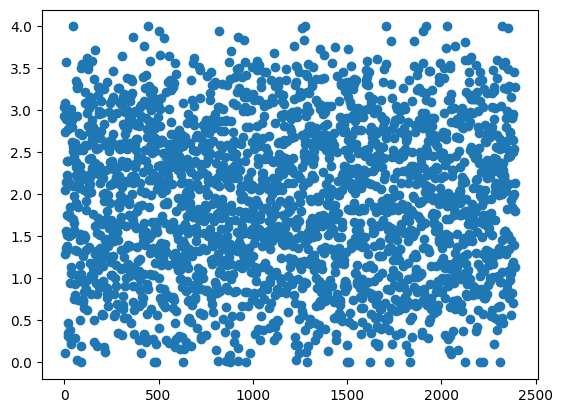

In [520]:
plt.scatter(df.index,df['Prom_notas'])
plt.show()

In [518]:
fig = px.scatter(df, x='Edad', y='Ausencias', title='Gráfico de Dispersión', labels={'x': 'Variable X', 'y': 'Variable Y'})

# Mostrar el gráfico
fig.show()

In [516]:
variables_num = ['Edad', 'Horas_de_est_semanal', 'Ausencias', 'Prom_notas']

for var in variables_num:
    fig = px.histogram(df, x=var, marginal='density', title=f'Histograma de {var}')
    fig.show()



AttributeError: 'NoneType' object has no attribute 'constructor'

# **7. Análisis Bivariado (En proceso)**

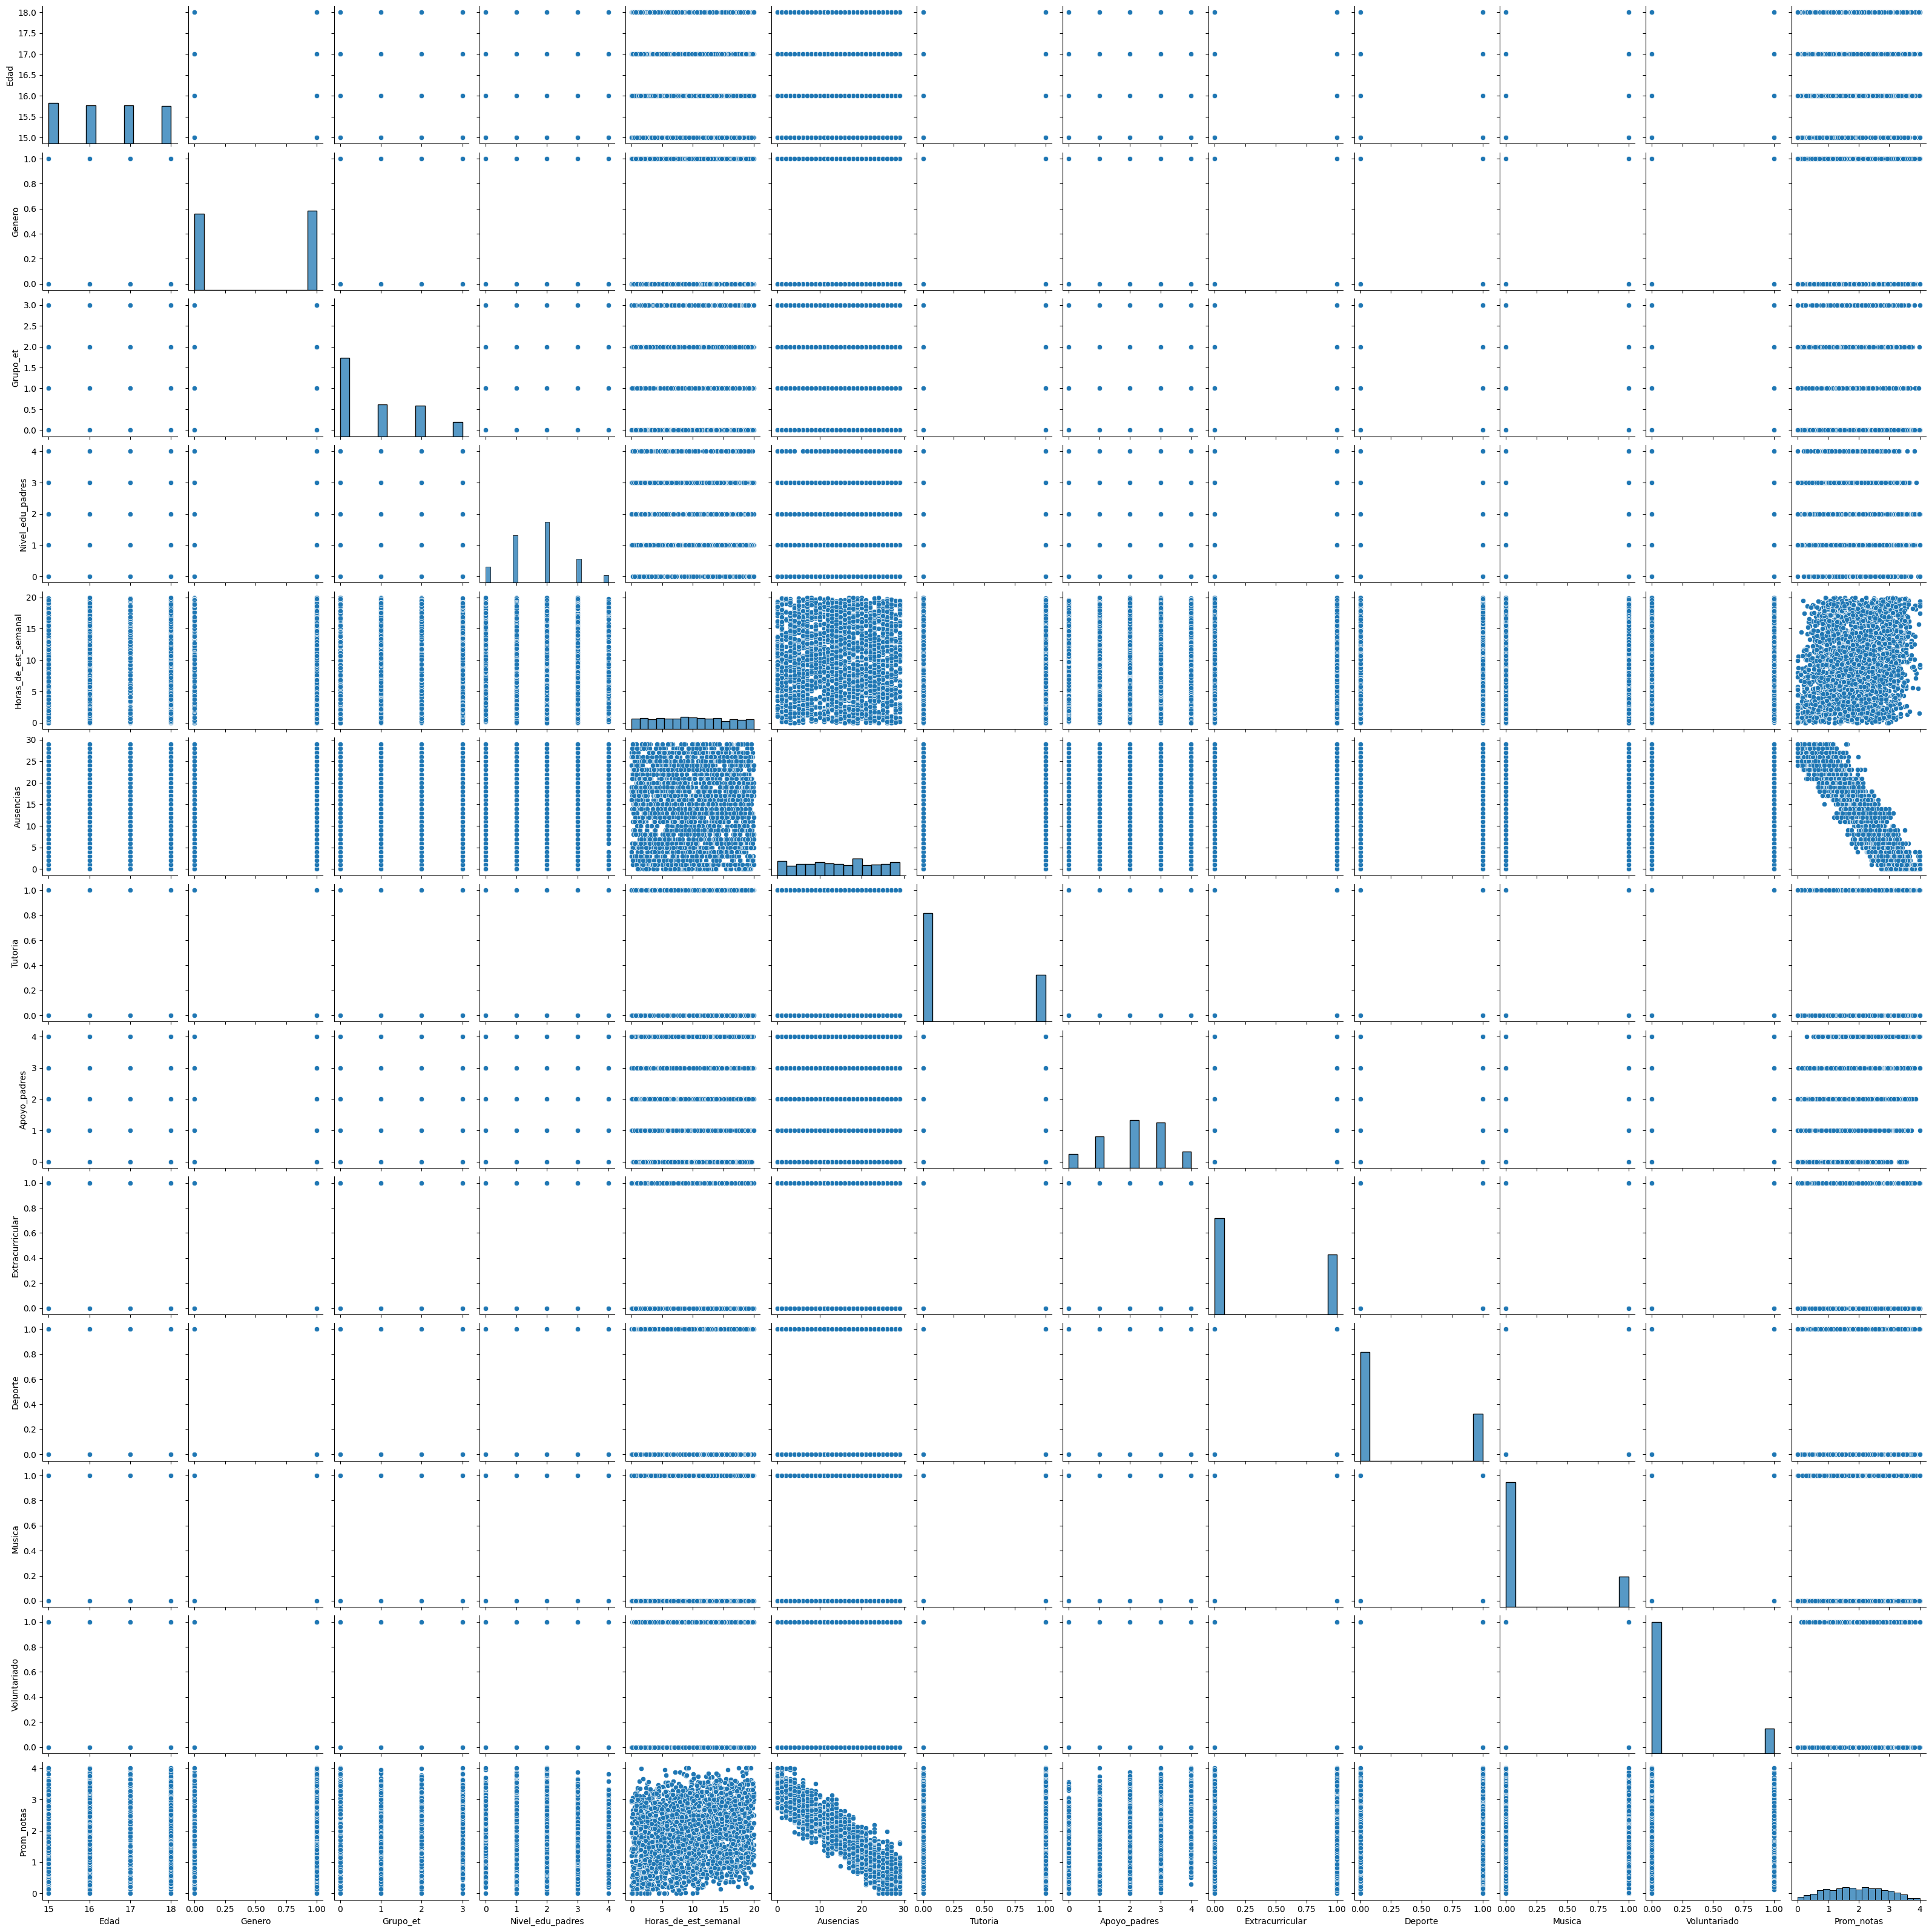

In [419]:
sns.pairplot(df)

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  2392 non-null   int64  
 1   Genero                2392 non-null   bool   
 2   Grupo_et              2392 non-null   int64  
 3   Nivel_edu_padres      2392 non-null   int64  
 4   Horas_de_est_semanal  2392 non-null   float64
 5   Ausencias             2392 non-null   int64  
 6   Tutoria               2392 non-null   bool   
 7   Apoyo_padres          2392 non-null   int64  
 8   Extracurricular       2392 non-null   bool   
 9   Deporte               2392 non-null   bool   
 10  Musica                2392 non-null   bool   
 11  Voluntariado          2392 non-null   bool   
 12  Prom_notas            2392 non-null   float64
 13  Estado_est            2392 non-null   object 
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 163.6+ KB


In [421]:
df.head()

Edad  Genero  Grupo_et  Nivel_edu_padres  Horas_de_est_semanal  Ausencias  \
0    17    True         0                 2             19.833723          7   
1    18   False         0                 1             15.408756          0   
2    15   False         2                 3              4.210570         26   
3    17    True         0                 3             10.028829         14   
4    17    True         0                 2              4.672495         17   

   Tutoria  Apoyo_padres  Extracurricular  Deporte  Musica  Voluntariado  \
0     True             2            False    False    True         False   
1    False             1            False    False   False         False   
2    False             2            False    False   False         False   
3    False             3             True    False   False         False   
4     True             3            False    False   False         False   

   Prom_notas Estado_est  
0    2.929196   Abandono  
1    3.042915   Graduado  
2    0.112602   Abandono  
3    2.054218   Abandono  
4    1.288061   Abandono

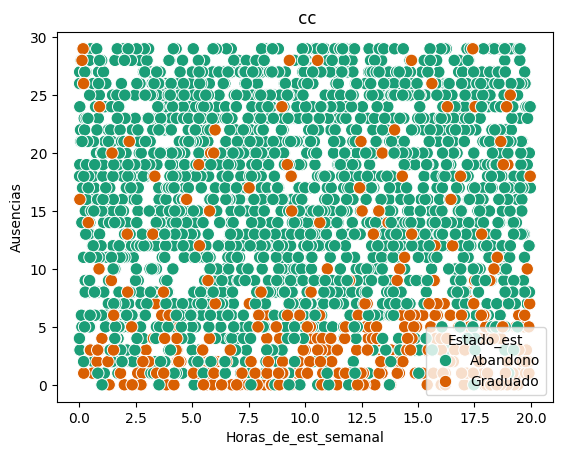

In [422]:
sns.scatterplot(x="Horas_de_est_semanal", y="Ausencias", hue="Estado_est", data=df, palette="Dark2", s=80)
plt.title(" cc")
plt.show()

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  2392 non-null   int64  
 1   Genero                2392 non-null   bool   
 2   Grupo_et              2392 non-null   int64  
 3   Nivel_edu_padres      2392 non-null   int64  
 4   Horas_de_est_semanal  2392 non-null   float64
 5   Ausencias             2392 non-null   int64  
 6   Tutoria               2392 non-null   bool   
 7   Apoyo_padres          2392 non-null   int64  
 8   Extracurricular       2392 non-null   bool   
 9   Deporte               2392 non-null   bool   
 10  Musica                2392 non-null   bool   
 11  Voluntariado          2392 non-null   bool   
 12  Prom_notas            2392 non-null   float64
 13  Estado_est            2392 non-null   object 
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 163.6+ KB


#### Se ajusta la varaible Estado_est a 0: Graduado y 1: Abandono para graficar el heatmap ya que esta herramienta no reconoce valores tipo object

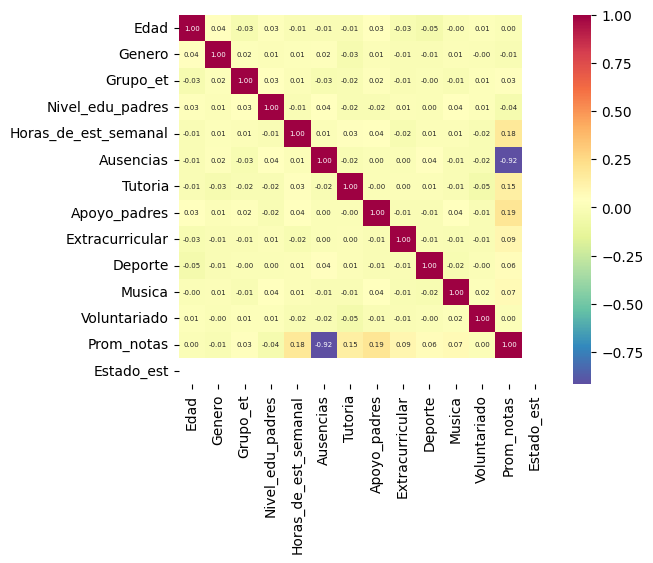

In [430]:
df['Estado_est'] = df['Estado_est'].map({'Graduado': 0, 'Abandono': 1})
df["Estado_est"].astype(float)

# Correlacion entre variables
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 5}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

In [198]:
alt.Chart(df).mark_boxplot().encode(x='Estado_est', y='Horas_de_est_semanal')

alt.Chart(...)

In [197]:
alt.Chart(df).mark_circle().encode(x='Horas_de_est_semanal', y='Nivel_edu_padres', color='Estado_est')

alt.Chart(...)

In [151]:
fig = px.violin(df, y='Prom_notas', box=True, points='all', labels={'Prom_notas': 'Promedio de Notas'})
fig.show()


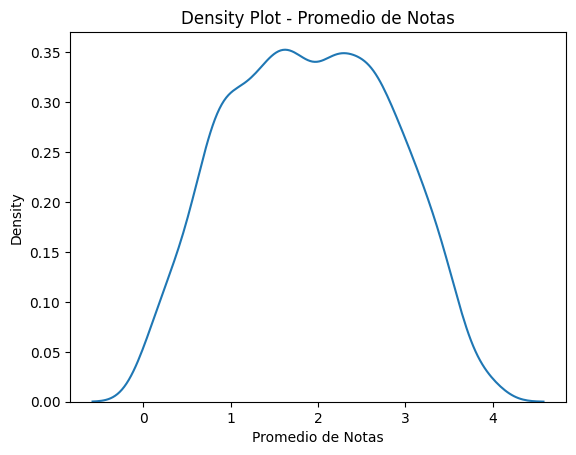

In [152]:

sns.kdeplot(df['Prom_notas'])
plt.title('Density Plot - Promedio de Notas')
plt.xlabel('Promedio de Notas')
plt.show()
